In [1]:
import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import tensorflow as tf
from tensorflow.keras import layers

In [2]:
test_dir = '../input/chest-xray-pneumonia/chest_xray/test'
train_dir = '../input/chest-xray-pneumonia/chest_xray/train'
val_dir = '../input/chest-xray-pneumonia/chest_xray/val'

In [3]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
train_dir,
color_mode='grayscale',
image_size=(128,128),
batch_size=32
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
test_dir,
color_mode='grayscale',
image_size=(128,128),
batch_size=32
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
val_dir,
color_mode='grayscale',
image_size=(128,128),
batch_size=32
)


Found 5216 files belonging to 2 classes.
Found 624 files belonging to 2 classes.
Found 16 files belonging to 2 classes.


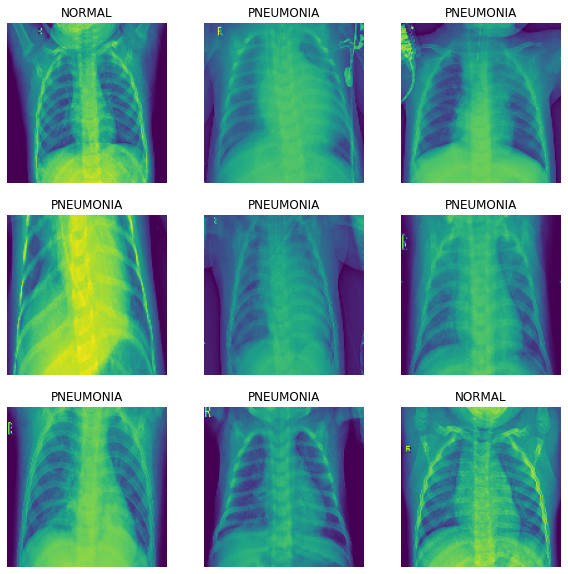

In [7]:
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(np.squeeze(images[i].numpy().astype("uint8")))
        plt.title(train_ds.class_names[labels[i]])
        plt.axis('off')

In [8]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [10]:
model = tf.keras.Sequential([
    layers.experimental.preprocessing.Rescaling(1./255),
    layers.Conv2D(32,3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(2, activation='relu')
])

In [11]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [14]:
history = model.fit(train_ds, 
                    epochs=10, 
                    validation_data=val_ds
                   )

Epoch 1/10
163/163 [==============================] - 49s 301ms/step - loss: 0.0222 - accuracy: 0.9923 - val_loss: 0.8507 - val_accuracy: 0.7500
Epoch 2/10
163/163 [==============================] - 49s 300ms/step - loss: 0.0224 - accuracy: 0.9908 - val_loss: 0.7059 - val_accuracy: 0.7500
Epoch 3/10
163/163 [==============================] - 49s 303ms/step - loss: 0.0194 - accuracy: 0.9919 - val_loss: 1.0244 - val_accuracy: 0.7500
Epoch 4/10
163/163 [==============================] - 49s 300ms/step - loss: 0.0140 - accuracy: 0.9952 - val_loss: 1.3363 - val_accuracy: 0.7500
Epoch 5/10
163/163 [==============================] - 49s 299ms/step - loss: 0.0120 - accuracy: 0.9948 - val_loss: 1.2697 - val_accuracy: 0.7500
Epoch 6/10
163/163 [==============================] - 49s 300ms/step - loss: 0.0090 - accuracy: 0.9964 - val_loss: 0.5491 - val_accuracy: 0.8750
Epoch 7/10
163/163 [==============================] - 49s 300ms/step - loss: 0.0052 - accuracy: 0.9987 - val_loss: 0.4139 - val_ac

In [15]:
model.evaluate(test_ds)

20/20 [==============================] - 2s 80ms/step - loss: 2.2529 - accuracy: 0.7788


[2.252933979034424, 0.7788461446762085]

20/20 - 2s - loss: 2.2529 - accuracy: 0.7788


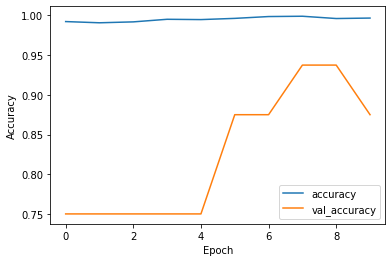

In [17]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
# plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_ds, verbose=2)

In [18]:
print(test_acc)

0.7788461446762085
